In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
import itertools

In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
cell_df=pd.read_csv(url)
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


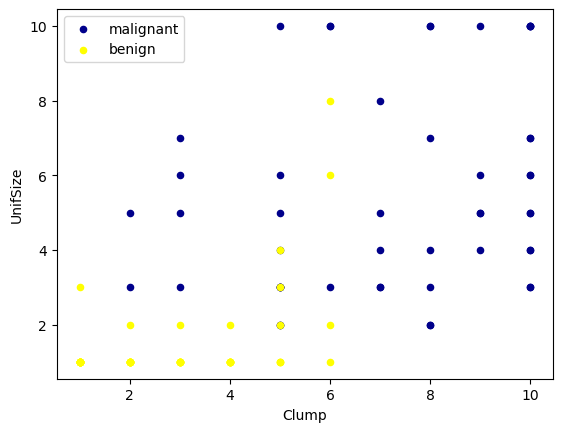

In [4]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [5]:
#Preprocesamiento de datos
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [6]:
#Conversión de datos a enteros
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [7]:
#Selección de datos
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [9]:
X= np.asarray(cell_df[['Clump','UnifSize','UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [13]:
y= np.asarray(cell_df['Class'].astype('int'))
y[0:5]

array([2, 2, 2, 2, 2])

In [14]:
#División de Dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [15]:
#Creación de modelo
clf = svm.SVC(kernel='rbf')

#Entrenamiento
clf.fit(X_train, y_train) 

#Predicción
pred = clf.predict(X_test)
pred [0:5]

array([2, 4, 2, 4, 2])

In [16]:
#Evaluación del modelo: Matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión, sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor real')
    plt.xlabel('Valor predicción')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Matriz de confusión, sin normalizar
[[85  5]
 [ 0 47]]


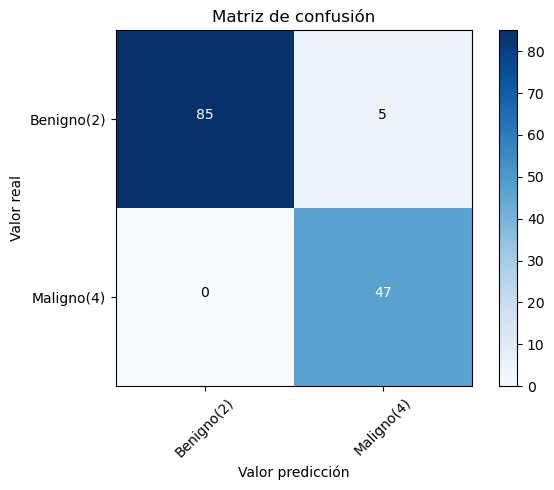

In [18]:
#Cálculo de Matriz de confusión

cnf_matrix = confusion_matrix(y_test, pred, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred))

# Impresión de matriz no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benigno(2)','Maligno(4)'],normalize= False,  title='Matriz de confusión')

In [19]:
#Evaluación de f1 score
f1_score(y_test, pred, average='weighted') 

0.9639038982104676

In [20]:
#Jaccard index de precisión
jaccard_score(y_test, pred,pos_label=2)

0.9444444444444444

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Matriz de confusión, sin normalizar
[[85  5]
 [ 0 47]]
Avg F1-score: 0.9639
Jaccard score: 0.9444


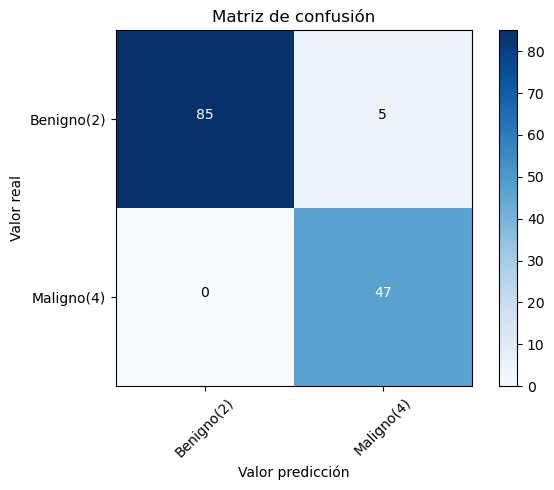

In [23]:
#Probando kernel lineal
#Creación de modelo
clf2 = svm.SVC(kernel='linear')

#Entrenamiento
clf2.fit(X_train, y_train) 

#Predicción
pred2 = clf2.predict(X_test)

cnf_matrix2 = confusion_matrix(y_test, pred2, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred2))

# Impresión de matriz no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=['Benigno(2)','Maligno(4)'],normalize= False,  title='Matriz de confusión')

print("Avg F1-score: %.4f" % f1_score(y_test, pred2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, pred2,pos_label=2))